In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

In [2]:
df = pd.read_csv('../data/mag/own_medsale_canafford_FHA_all.csv')

In [3]:
df.columns

Index(['puma', 'can_tot', 'cant_tot', 'can_buy', 'cant_buy'], dtype='object')

## map percent that can/can't by neighborhood

In [4]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
geo = gpd.read_file('../data/geo/shapefiles/PUMAS.geojson')
#geo.head(2)

In [6]:
phx = gpd.read_file('../data/geo/shapefiles/phx.geojson')
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)
road = gpd.read_file('../data/geo/shapefiles/maricopa_primroads.geojson')
road = road.to_crs(4269)
mask = gpd.read_file('../data/geo/shapefiles/PUMAS_mask.geojson')

### join data to geo files

In [7]:
df = pd.merge(geo,df,how='left',left_on='joinid',right_on='puma')

In [8]:
df.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry,puma,can_tot,cant_tot,can_buy,cant_buy
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475...",400129,91265,456462,0.166625,0.833375
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874...",400112,46444,501283,0.084794,0.915206


In [9]:
df.describe()

,ALAND20,AWATER20,joinid,puma,can_tot,cant_tot,can_buy,cant_buy
count,1.500000e+01,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.500315e+08,4.751324e+05,400119.466667,400119.466667,163117.866667,384609.133333,0.297809,0.702191
std,1.990223e+08,9.764382e+05,5.235411,5.235411,61313.036092,61313.036092,0.111941,0.111941
min,3.348861e+07,2.684700e+04,400112.000000,400112.000000,46444.000000,281061.000000,0.084794,0.513141
25%,5.061796e+07,7.029600e+04,400115.500000,400115.500000,114744.500000,354834.000000,0.209492,0.647830
50%,7.508780e+07,1.879480e+05,400119.000000,400119.000000,175457.000000,372270.000000,0.320337,0.679663
75%,1.181456e+08,3.115855e+05,400122.500000,400122.500000,192893.000000,432982.500000,0.352170,0.790508
max,6.540404e+08,3.894959e+06,400129.000000,400129.000000,266666.000000,501283.000000,0.486859,0.915206


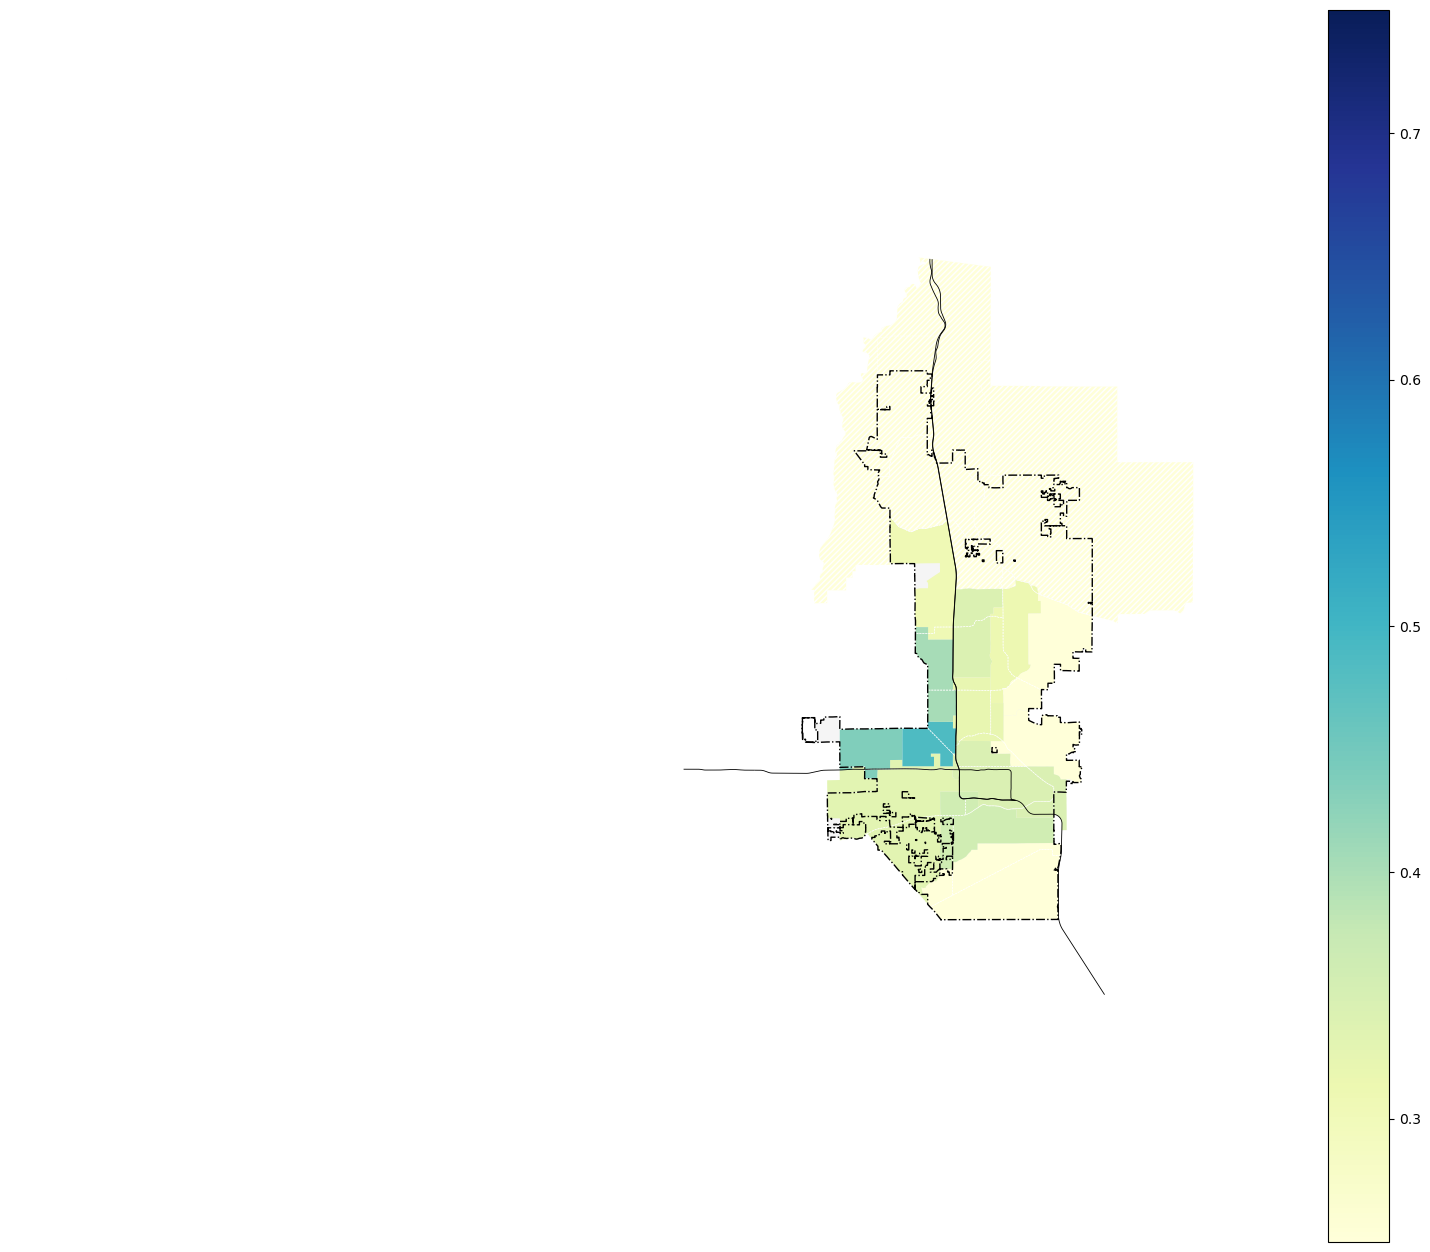

In [13]:
# percent can buy
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0.25,vmax=.75)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = f'can_buy', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig('img/can_buy_FHA_ylgnbu.jpg', dpi = 300) # saving each plot

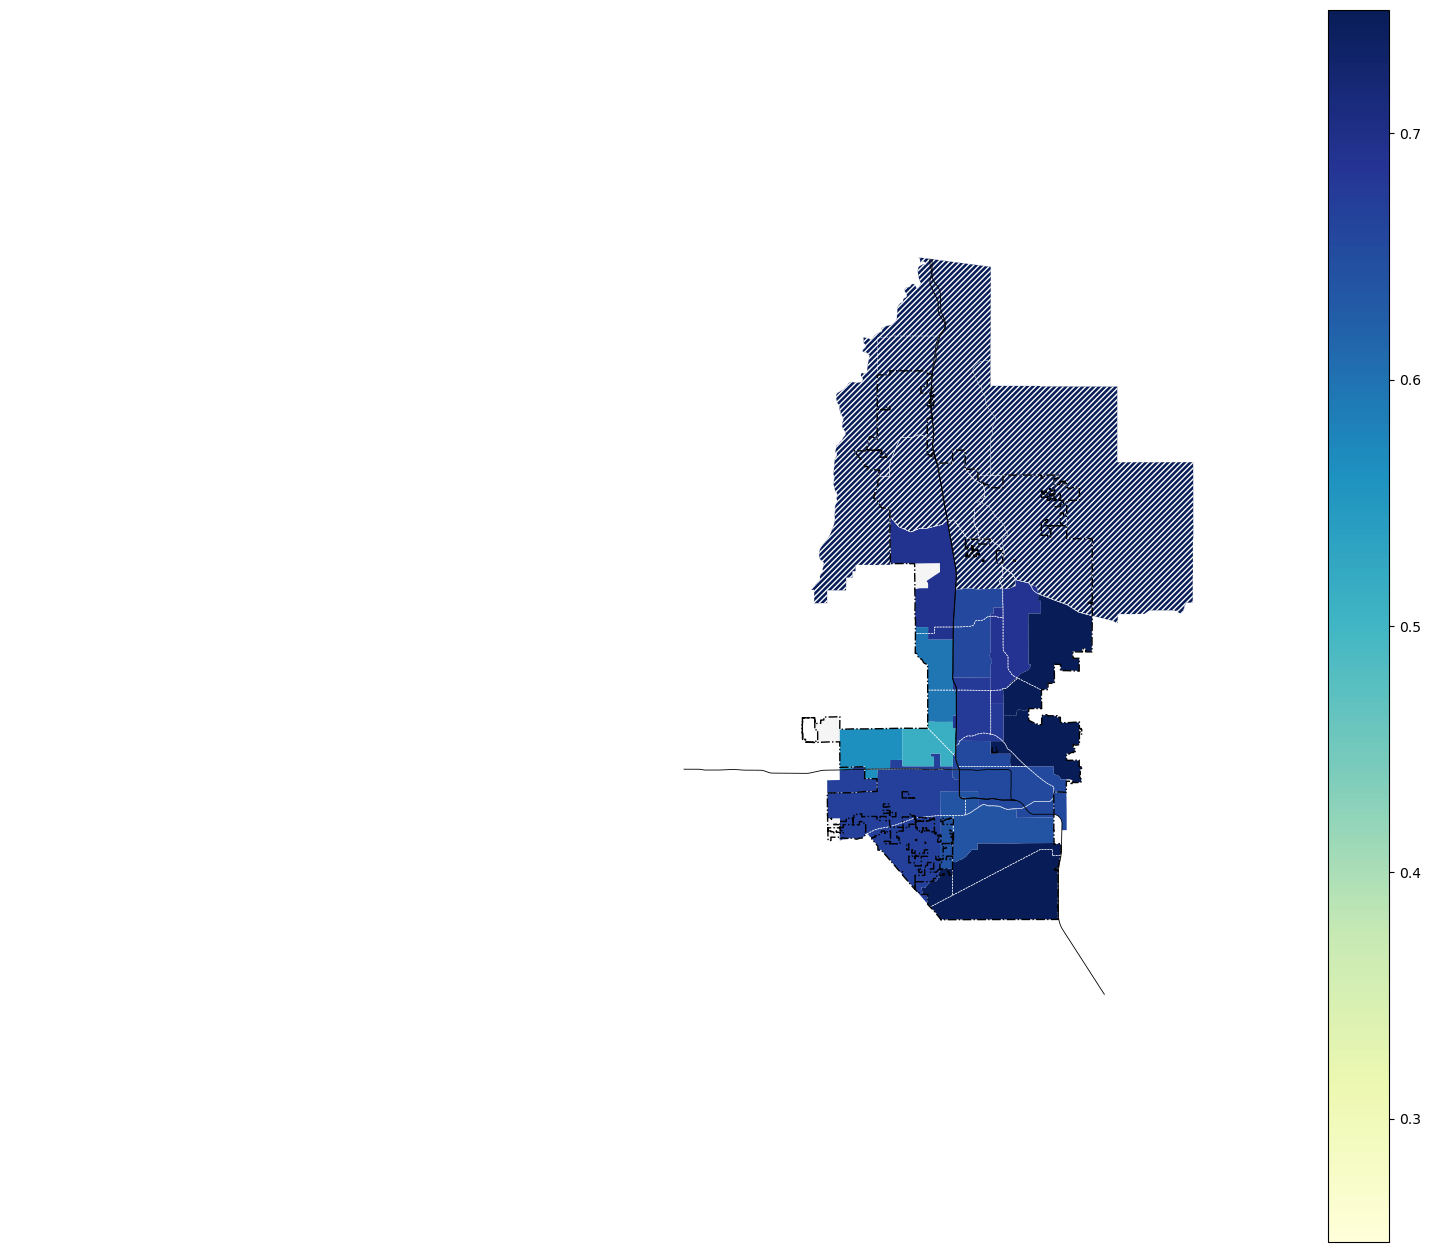

In [14]:
# percent can buy
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=.25,vmax=.75)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = f'cant_buy', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig(f'img/cant_buy_FHA_ylgnbu.jpg', dpi = 300) # saving each plot